#Install

In [1]:
%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 40 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 1s (2,814 kB/s)
Selecting previously unselected

In [2]:
pip install Shapely

In [3]:
from shapely.geometry import Point
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt 
import folium
import plotly_express as px
from google.colab import drive
from IPython.display import display
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
pip install pyproj

#Read file

In [9]:
Province_Boundary = "/content/drive/My Drive/2 Boundary/1-1_Province_Boundary_-_mitrearth.shp"
Province_Point = "/content/drive/My Drive/2 Boundary/2_Province_Point_-_mitrearth.shp"
District_Boundary = "/content/drive/My Drive/2 Boundary/3_District_Boundary_-_mitrearth.shp"
District_Point = "/content/drive/My Drive/2 Boundary/4_District_Point_-_mitrearth.shp"
districtNameNE = "/content/drive/My Drive/district_NE_name.xlsx"

In [10]:
province = gpd.read_file(Province_Boundary)
provincePoint = gpd.read_file(Province_Point)
district = gpd.read_file(District_Boundary)
districtPoint = gpd.read_file(District_Point)
districtNE_name = pd.read_excel(districtNameNE)

#Sample Data

In [8]:
province.head()

,LAYER,AREA,PERIMETER,THAI_BND_,THAI_BND_I,PROV_CODE,PROV_NAME,PROV_THAI,PART,REC_NO,geometry
0,Unknown Area Type,220000.0,669905.5000,2,210,12,CHIANG RAI,เชียง,N,1,"POLYGON ((99.51149 20.15202, 99.51826 20.15514..."
1,Unknown Area Type,500000.0,276493.0000,3,211,13,CHIANG MAI,เชียง,N,2,"POLYGON ((98.47065 19.69139, 98.47547 19.69226..."
2,Unknown Area Type,650000.0,939088.3125,4,212,43,MAE HONG SON,แม่ฮ่,N,3,"POLYGON ((97.49681 18.49784, 97.49754 18.49740..."
3,Unknown Area Type,50000.0,424450.6875,5,213,72,PHAYAO,พะเยา,N,4,"POLYGON ((100.40893 19.73584, 100.41494 19.732..."
4,Unknown Area Type,610000.0,695939.5000,6,214,26,NAN,น่าน,N,5,"POLYGON ((100.34017 18.80729, 100.34279 18.815..."


In [11]:
len(province)

208

In [12]:
provincePoint.head()

,LONGITUDE,LATITUDE,CHWT_CODE,AMP_THAI,AMP_ENG,geometry
0,100.498497,13.758519,1,กรุงเ,Bangkok,POINT (100.49850 13.75852)
1,98.921410,8.054342,2,กระบี,Krabi,POINT (98.92141 8.05434)
2,99.553276,14.001893,3,กาญจน,Kanchanaburi,POINT (99.55328 14.00189)
3,103.509636,16.430960,4,กาฬสิ,Kalasin,POINT (103.50964 16.43096)
4,99.523453,16.482052,5,กำแพง,Kamphaengphet,POINT (99.52345 16.48205)


In [13]:
len(provincePoint)

74

In [16]:
district.head()

,AMP_CODE,PRV_CODE,AMP_NAME_T,AMP_NAME_E,Shape_Leng,Shape_Area,geometry
0,1001,10,พระนคร,Phra Nakhon,10496.572137,6.242791e+06,"POLYGON ((100.50069 13.74108, 100.49988 13.738..."
1,1002,10,ป้อมปราบศัตรูพ่าย,Pom Prap Sattruphai,7875.336921,2.882614e+06,"POLYGON ((100.51572 13.73818, 100.51572 13.738..."
2,1003,10,สัมพันธวงศ์,Samphanthawong,6371.598521,1.633743e+06,"POLYGON ((100.51270 13.72931, 100.51238 13.729..."
3,1004,10,ปทุมวัน,Pathum Wan,14149.242262,9.293305e+06,"POLYGON ((100.51741 13.75315, 100.51901 13.752..."
4,1005,10,บางรัก,Bang Rak,9849.844139,4.634686e+06,"POLYGON ((100.51734 13.71810, 100.51717 13.718..."


In [36]:
len(district)

1284

In [11]:
districtNE_name.head()

,name,province
0,กมลาไสย,กาฬสินธุ์
1,กระนวน,ขอนแก่น
2,กระสัง,บุรีรัมย์
3,กันทรลักษ์,ศรีสะเกษ
4,กันทรวิชัย,มหาสารคาม


In [15]:
len(districtNE_name)

322

In [65]:
districtNE_name.province.unique()

array(['กาฬสินธุ์', 'ขอนแก่น', 'บุรีรัมย์', 'ศรีสะเกษ', 'มหาสารคาม',
       'สุรินทร์', 'อุบลราชธานี', 'อุดรธานี', 'ยโสธร', 'สกลนคร',
       'ร้อยเอ็ด', 'ชัยภูมิ', 'นครราชสีมา', 'มุกดาหาร', 'อำนาจเจริญ',
       'เลย', 'บึงกาฬ', 'หนองคาย', 'นครพนม', 'หนองบัวลำภู'], dtype=object)

#Filter NE for districtPoint

In [9]:
ne_district = [68,54,56,70,20,75,4,6,43,11,42,47,45,76,73,21,27,55,67]
NE = np.array(ne_district)
NE

array([68, 54, 56, 70, 20, 75,  4,  6, 43, 11, 42, 47, 45, 76, 73, 21, 27,
       55, 67])

In [10]:
frame = []
for code in NE:
  df = pd.DataFrame()
  df = districtPoint[districtPoint.CHWT_CODE == code]
  frame.append(df)

districtPoint_NE = pd.DataFrame()
districtPoint_NE = pd.concat(frame)

In [11]:
districtPoint_NE.reset_index(inplace=True)

In [12]:
districtPoint_NE.drop('index',axis=1)

,LAYER,POINT_ID,AMP_CODE,CHWT_CODE,AMP_THAI,AMP_ENG,UTM_EAST,UTM_NORTH,LONGITUDE,LATITUDE,geometry
0,Unknown Point Feature,744,6801,68,อำเภอเมื,Muang Nong Khai,896655.44,1980484.38,102.742081,17.877415,POINT (102.73903 17.87915)
1,Unknown Point Feature,745,6802,68,อำเภอเซก,Seka,1025381.38,1988877.13,103.955673,17.925933,POINT (103.95266 17.92768)
2,Unknown Point Feature,746,6803,68,อำเภอโซ่,So Phisai,971084.19,1996170.13,103.446358,18.004039,POINT (103.44333 18.00578)
3,Unknown Point Feature,747,6804,68,อำเภอท่า,Tha Bo,879983.44,1976903.13,102.584381,17.848063,POINT (102.58132 17.84980)
4,Unknown Point Feature,748,6805,68,อำเภอบึง,Bung Kan,992586.56,2036748.13,103.658539,18.364843,POINT (103.65551 18.36657)
...,...,...,...,...,...,...,...,...,...,...,...
281,Unknown Point Feature,739,6709,67,อำเภอลำด,Lamduan,1003891.31,1633168.88,103.676514,14.726113,POINT (103.67353 14.72801)
282,Unknown Point Feature,740,6710,67,อำเภอศรี,Srikhoraphum,1016107.13,1657627.63,103.794464,14.944171,POINT (103.79149 14.94606)
283,Unknown Point Feature,741,6711,67,อำเภอสนม,Sanom,1012256.19,1685498.38,103.764374,15.196043,POINT (103.76140 15.19792)
284,Unknown Point Feature,742,6712,67,อำเภอสัง,Sangkha,1023446.63,1623394.00,103.855591,14.634313,POINT (103.85263 14.63622)


In [13]:
districtPoint.geometry

0      POINT (100.49544 13.76043)
1      POINT (100.58599 13.70653)
2      POINT (100.50931 13.73133)
3      POINT (100.57091 13.83010)
4      POINT (100.48173 13.69669)
                  ...            
838    POINT (104.91552 15.88797)
839    POINT (104.84142 15.68261)
840    POINT (104.64663 15.69775)
841    POINT (104.66670 16.03924)
842    POINT (104.49125 15.69708)
Name: geometry, Length: 843, dtype: geometry

In [14]:
lon = districtPoint_NE.geometry.x
lat = districtPoint_NE.geometry.y
coord = list(zip(lon,lat))

#Filter NE for district

code จังหวัดในภาคอีสานสำหรับ district เพื่อใช้ filter

In [141]:
districtCodeNew = []
districtCodeNew = ['30','31','32','33','34','35','36','37','38','40','41','42','43','44','45','46','47','48','49']
districtCode = np.array(districtCodeNew)
districtCode

array(['30', '31', '32', '33', '34', '35', '36', '37', '38', '40', '41',
       '42', '43', '44', '45', '46', '47', '48', '49'], dtype='<U2')

เจอข้อมูล None มันคือจังหวัด"หนองบัวลำภู" ในภาคอีสานซึ่งตัว geometry ยังใช้งานได้แต่ข้อมูลอื่นๆเป็น None

In [203]:
district.loc[418:423]

,AMP_CODE,PRV_CODE,AMP_NAME_T,AMP_NAME_E,Shape_Leng,Shape_Area,geometry
418,3901,None,None,None,218449.011279,1.189016e+09,"POLYGON ((102.39253 17.38252, 102.39633 17.379..."
419,3902,None,None,None,190622.272867,7.934911e+08,"POLYGON ((102.13153 17.49852, 102.13277 17.498..."
420,3903,None,None,None,127457.559383,7.620915e+08,"POLYGON ((102.62819 17.01421, 102.62874 17.013..."
421,3904,None,None,None,253122.478708,1.053086e+09,"POLYGON ((102.06074 17.20408, 102.06092 17.204..."
422,3905,None,None,None,142751.437069,6.590840e+08,"POLYGON ((102.31839 17.67681, 102.31874 17.667..."
423,3906,None,None,None,112804.483987,3.119587e+08,"POLYGON ((102.11180 17.48183, 102.12026 17.467..."


In [204]:
frame2 = []
for code in districtCode:
  df2 = pd.DataFrame()
  df2 = district[district.PRV_CODE == code]
  frame2.append(df2)
frame2.append(district.loc[418:423])
district_NE = pd.DataFrame()
district_NE = pd.concat(frame2)

In [206]:
district_NE = district_NE.reset_index()

In [232]:
district_NE.drop(['index'],axis=1,inplace=True)

ตรวจเจออำเภอแปลกปลอมจะทำการลบออก

In [239]:
district_NE[district_NE.AMP_CODE == '4502']

,AMP_CODE,PRV_CODE,AMP_NAME_T,AMP_NAME_E,Shape_Leng,Shape_Area,geometry
241,4502,45,ร้องกวาง,Kaset Wisai,175736.547478,9.905750e+08,"POLYGON ((103.65090 15.77613, 103.65614 15.775..."
242,4502,45,ร้องกวาง,Kaset Wisai,71333.823485,1.782166e+08,"POLYGON ((100.44376 18.49030, 100.44392 18.490..."


In [240]:
district_NE.drop(index=242,axis=1,inplace=True)

#Plot

In [131]:
mapit = folium.Map( location=[ 17.87914890447798,102.7390305957055], zoom_start=6 )
for lon,lat in coord:
    folium.Marker( location=[ lat, lon ] ).add_to( mapit )
display(mapit)

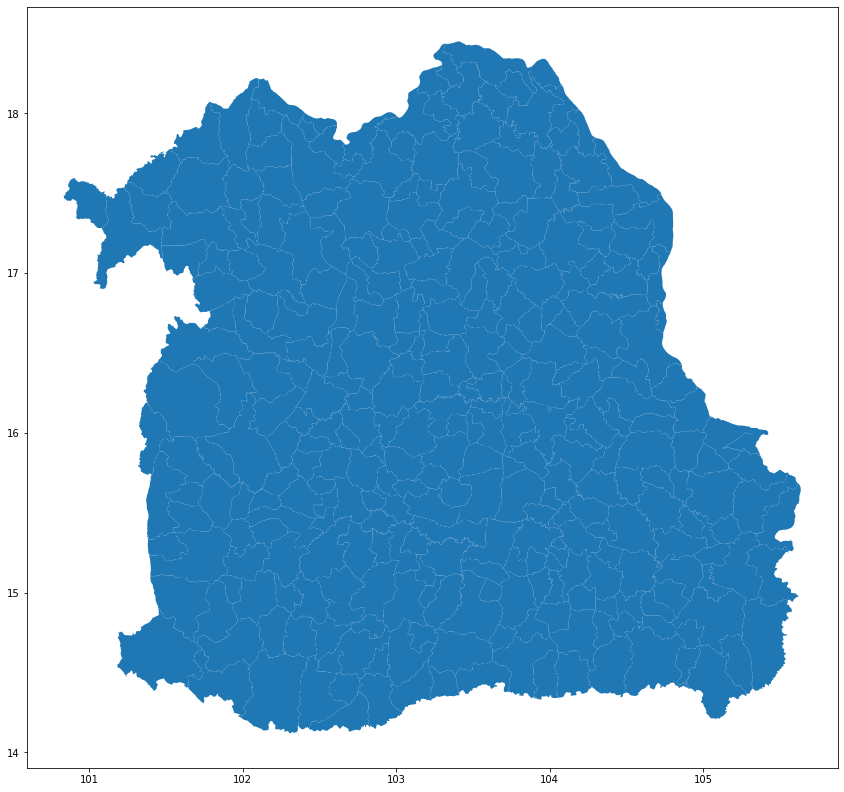

In [241]:
district_NE.plot(figsize=(16,14));

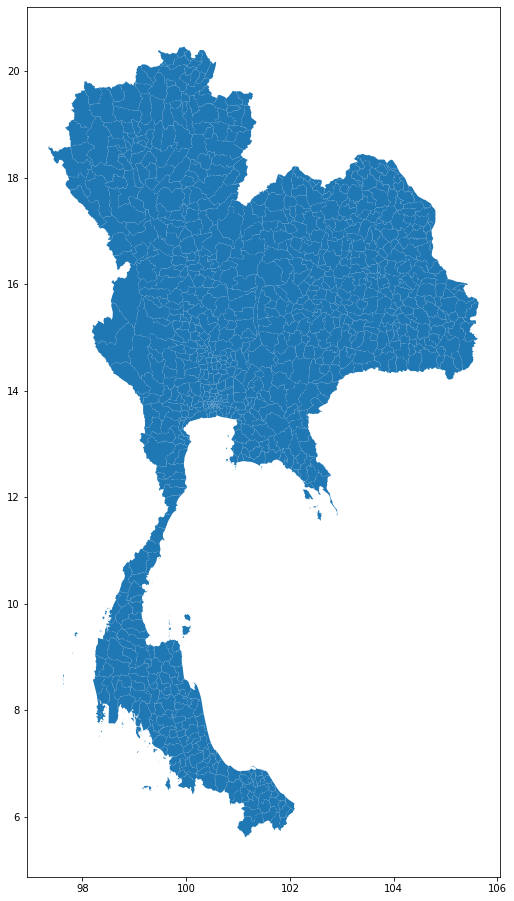

In [18]:
district.plot(figsize=(18,16));